3 Basic equations in EEG Analysis

1. Sine Wave

(3000,)


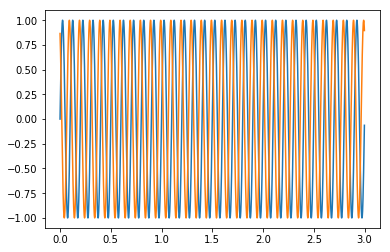

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import fft, arange
from scipy.signal import correlate
from pylab import plot, show, title, xlabel, ylabel, subplot
from Preprocessing import *

freq=10
ampl=1
phas=0

srat=1000
sex =3
time = np.arange(srat*sex) / srat
print(time.shape)

signal1 = ampl*np.sin(2*np.pi*freq*time + phas)
signal2 = ampl*np.sin(2*np.pi*freq*time + (phas+2*np.pi/3))
        
plt.plot(time, signal1)
plt.plot(time, signal2)

xcorr=correlate(signal1, signal2)

# The peak of the cross-correlation gives the shift between the two signals
# The xcorr array goes from -nsamples to nsamples
#dt = np.linspace(-time[-1], time[-1], 2*srat-1)
#recovered_time_shift = dt[xcorr.argmax()]

# force the phase shift to be in [-pi:pi]
#recovered_phase_shift = 2*np.pi*(((0.5 + recovered_time_shift/(1/freq)) % 1.0) - 0.5)

#relative_error = (recovered_phase_shift - phase_shift)/(2*np.pi)

#print "Original phase shift: %.2f pi" % (phase_shift/pi)
#print ("Recovered phase shift: %.2f pi" % (recovered_phase_shift/np.pi))

2. Gaussian

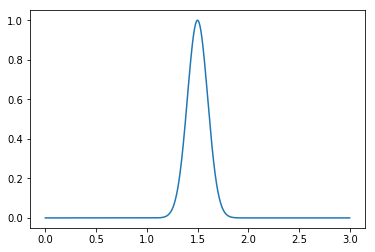

In [5]:
width = 0.1
peaktime = 1.5

gaus = np.exp((-(time-peaktime)**2)/(2*width**2))

plot(time,gaus)

3. Euler's Formula

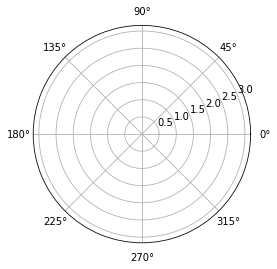

In [79]:
m = 1.5
k = np.pi/2

eule = m*np.exp(1j*k)

plt.polar(np.angle(eule),2*abs(eule))

Sum of sine waves and Fast Fourier Transform

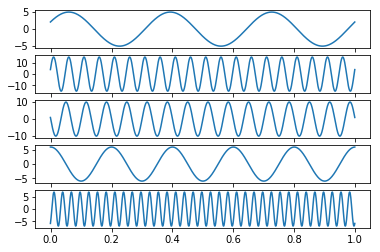

In [217]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = (3, 20, 15, 5, 35)
amplit = (5, 15, 10, 6, 7)
phases = (np.pi/7, np.pi/8, np.pi, np.pi/2, -np.pi/4)
srat = 1000
secs = 1
time = np.arange(-1,srat*secs) / srat

sine_waves = np.empty((len(frequencies), len(time)))
for f, freq in enumerate(frequencies):
    sine_waves[f,:] = amplit[f]*np.sin(2*np.pi*freq*time + phases[f])
    plt.subplot(len(frequencies),1,f+1)
    plot(time,sine_waves[f,:])

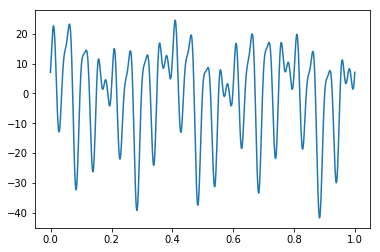

In [218]:
plot(time,sum(sine_waves))

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 45)

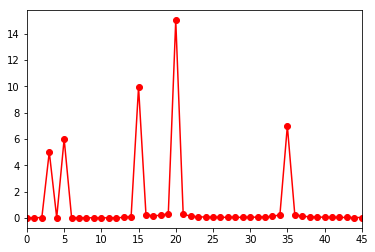

In [219]:
srate = 1000
sineX = fft(sum(sine_waves))/len(time)
hz = np.linspace(0, int(srate)/2, np.floor(int(len(time))/2)+1)
plot(hz, 2*abs(sineX[0:len(hz)]), '-ro')
plt.xlim(right=45, left=0)

Discrete-Time Fourier Transform by hand

(0, 45)

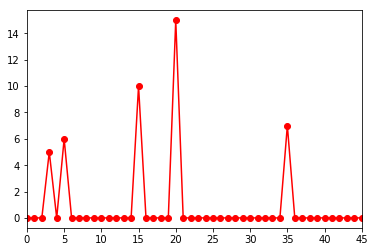

In [279]:
signal = sum(sine_waves)
N      = len(signal)
Fourier_Time = np.arange(0,N-1)/(N-1)
Nyqux  = srat/2

Fourier_Coeff = np.empty((len(signal)-1),dtype=complex)

freqs  = np.linspace(0, int(Nyqux), int(np.floor(N/2))+1)

for n in range(N-1):
    Fourier_Sine = np.exp(-2j*np.pi*n*Fourier_Time)
    Fourier_Coeff[n] = sum(Fourier_Sine * signal[0:1000])
 
Fourier_Coeff = Fourier_Coeff/(N-1)
    
plot(freqs, 2*abs(Fourier_Coeff[0:len(freqs)]), '-ro')
plt.xlim(right=45, left=0)

Inverse Discrete-Time Fourier Transform

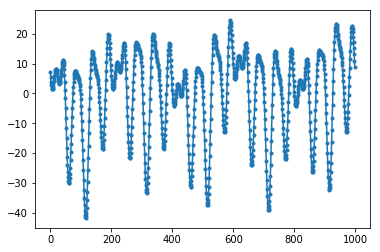

In [286]:
recov_signal = np.empty(len(signal)-1,dtype=complex)

for n in range(N-1):
    Fourier_Sine = Fourier_Coeff[n] * np.exp(-2j*np.pi*n*Fourier_Time)
    recov_signal = recov_signal + Fourier_Sine
    
plot(np.real(recov_signal),'.-')


Complex Sine Wave

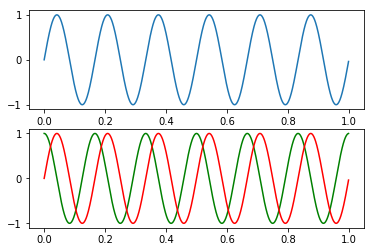

In [4]:
srat = 1000
time = arange(0,1,1/srat)
freq = 6

realv_sine = np.sin(2*np.pi*freq*time)
compl_sine = np.exp(1j*2*np.pi*freq*time)

plt.subplot(2,1,1)
plot(time, realv_sine)
plt.subplot(2,1,2)
plot(time, np.real(compl_sine), 'g')
plot(time, np.imag(compl_sine), 'r')

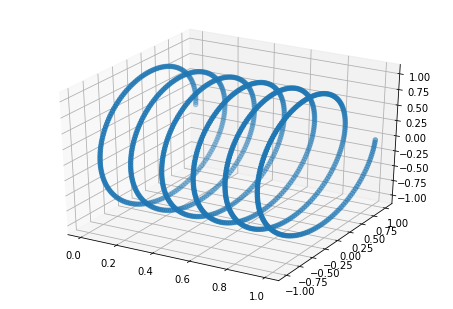

In [5]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(time, np.real(compl_sine), np.imag(compl_sine))
pyplot.show()

Extracting Phase & Magnitude from Complex Sine Waves

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


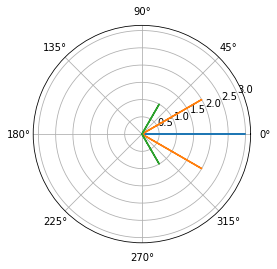

In [126]:
from scipy.spatial import cKDTree

srat = 1000
time = arange(0,1,1/srat)
freq = 6

sine1 = 3*np.cos(2*np.pi*freq*time + 0)
sine2 = 2*np.cos(2*np.pi*freq*time + np.pi/6)
sine3 = 1*np.cos(2*np.pi*freq*time + np.pi/3)

fCoef1 = fft(sine1) / len(time)
fCoef2 = fft(sine2) / len(time)
fCoef3 = fft(sine3) / len(time)

hz[:,0] = np.linspace(0, int(srat)/2, np.floor(int(len(time))/2)+1)

plt.polar(np.angle(fCoef1), 2*abs(fCoef1))
plt.polar(np.angle(fCoef2), 2*abs(fCoef2))
plt.polar(np.angle(fCoef3), 2*abs(fCoef3))

(3, 9)

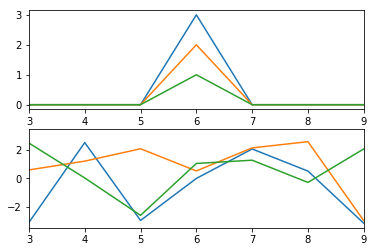

In [131]:
amp1 = np.sqrt( np.imag(fCoef1)**2 + np.real(fCoef1)**2)
amp2 = abs(fCoef2)
amp3 = abs(fCoef3)

plt.subplot(2,1,1)
plot(hz, 2*amp1[0:len(hz)])
plot(hz, 2*amp2[0:len(hz)])
plot(hz, 2*amp3[0:len(hz)])
plt.xlim(right=9, left=3)

ph1 = np.arctan2(np.imag(fCoef1), np.real(fCoef1))
ph2 = np.angle(fCoef2)
ph3 = np.angle(fCoef3)

plt.subplot(2,1,2)
plot(hz, ph1[0:len(hz)])
plot(hz, ph2[0:len(hz)])
plot(hz, ph3[0:len(hz)])
plt.xlim(right=9, left=3)
#plt.ylim(right=9, left=3)

Morlet Wavelet

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


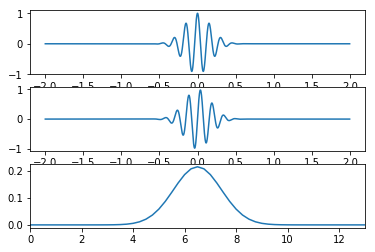

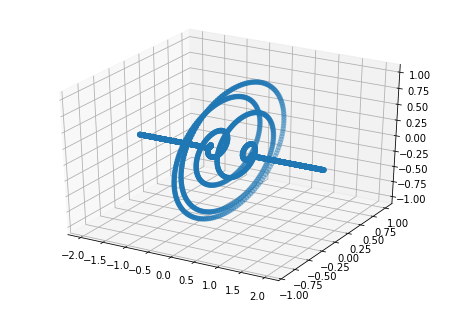

In [164]:
sratw = 1000
timew = arange(-2,2,1/srate) # Negative to Positive enforces odd number of peaks
freqw = 6.5 

# Sine Wave
sinew = np.exp(2j*np.pi*freqw*timew) 

# Standard Deviation and Gaussian
s = 7 / (2*np.pi*freqw) # 7 refers to the number of cycles
gausw = np.exp((-timew**2)/(2*s**2))

# Morlet Wavelet
wavel = sinew * gausw

subplot(3,1,1)
plot(time, np.real(wavel))
subplot(3,1,2)
plot(time, np.imag(wavel))

# Frequency response of the wavelet
waveX = fft(wavel) / len(wavel)
hzw = np.linspace(0, sratw/2, np.floor(len(wavel)/2)+1) 
subplot(3,1,3)
plot(hzw, 2*abs(waveX[0:len(hzw)]))
plt.xlim(left=0, right=13)

# 3D representation of the wavelet, imaginary vs. real vs. time
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(time, np.real(wavel), np.imag(wavel))
pyplot.show()

90° Shifting between the imaginary part (sin(x) and the real part (cos(x))

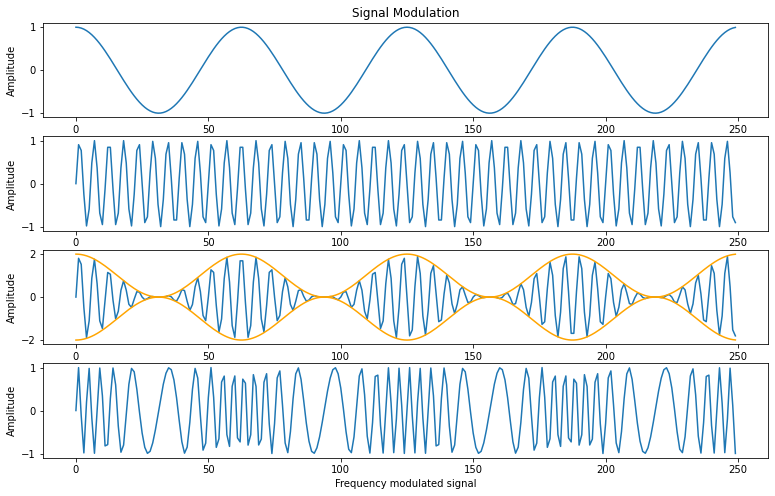

In [9]:
### Signals modulation

import numpy as np
import matplotlib.pyplot as plt

# Amplitude Modulation
def create_burst(mod_freq, car_freq):
    modulation_index = 1
    time = np.arange(250) / 250
    modulator = np.cos(2.0 * np.pi * mod_freq * time) * modulation_index
    carrier = np.sin(2.0 * np.pi * car_freq * time) 
    burst =  (1 + modulator) * carrier
    return burst, modulator, carrier

burst, modulator, carrier = create_burst(4, 45)
# np.savetxt('coupling', burst)

# Frequency Modulation
def create_phasor(mod_freq, car_freq):
    modulation_index = 1
    time = np.arange(250) / 250
    modulator = np.sin(2.0 * np.pi * mod_freq * time) * modulation_index
    carrier = np.cos(2.0 * np.pi * car_freq * time)
    phasor = np.zeros_like(modulator)

    for i, t in enumerate(time):
        phasor[i] = np.sin(2. * np.pi * (car_freq * t + modulator[i]))  
    return phasor, modulator, carrier

phasor, modulator1, carrier1 = create_phasor(4,40)      

fig1 = plt.figure(figsize=(13, 8))
plt.subplot(4, 1, 1)
plt.title('Signal Modulation')
plt.plot(modulator)
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
# plt.show()
plt.subplot(4, 1, 2)
plt.plot(carrier)
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
# plt.show()
plt.subplot(4, 1, 3)
plt.plot(burst)
plt.plot(modulator+1, 'orange')
plt.plot(-modulator-1, 'orange')
plt.ylabel('Amplitude')
plt.xlabel('Amplitude modulated signal')
# plt.show()
plt.subplot(4, 1, 4)
plt.plot(phasor)
plt.ylabel('Amplitude')
plt.xlabel('Frequency modulated signal')
plt.show()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


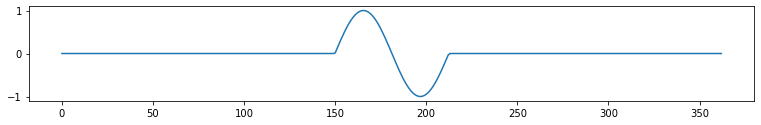

In [34]:
a=np.zeros(150)
print(a)
fig1 = plt.figure(figsize=(13, 8))
plt.subplot(4, 1, 1)
plt.plot(np.concatenate((a,modulator[47:110],a)))